<a href="https://colab.research.google.com/github/sachinthadilshann/Obstacle-Detection-System-For-Road-Safety/blob/main/yolov8n_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Nov 22 05:52:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! unzip /content/drive/MyDrive/Research_Project/Finaldata.zip

Streaming output truncated to the last 5000 lines.
  inflating: Finaldata/train/labels/68_JPG_jpg.rf.dbda03145db4e1dee0fadd24aa6f95c1.txt  
  inflating: Finaldata/train/labels/6alkr00kmx_Asian_Elephants_WW252891_jpg.rf.dfec595f8fb55acd7904703aad685912.txt  
  inflating: Finaldata/train/labels/6ba08eb4f283e4ed_jpg.rf.f7397a05c47b00571648975e897ff2ae.txt  
  inflating: Finaldata/train/labels/6UXTVRPZCVASDFNYCOTASKER4M_jpg.rf.6711ba9094f402b7f49413d05dc006fc.txt  
  inflating: Finaldata/train/labels/7513277910_0637bdd3ef_o_jpg.rf.19d7c628e376c260a75c71319125f5f7.txt  
  inflating: Finaldata/train/labels/77308130_jpg.rf.0fb842cc55a2d7385e4a71219575146d.txt  
  inflating: Finaldata/train/labels/779_jpeg_jpg.rf.e0959e04697bc49283f1b3a4d70f8494.txt  
  inflating: Finaldata/train/labels/7db827fb-e15d-4315-9f0a-16c8d38f9d5c_1920x1080_jpg.rf.8895dd25c512b308cc2e1629704cb473.txt  
  inflating: Finaldata/train/labels/800px-African_buffalo_28Syncerus_caffer_caffer29_male_with_cattle_egret_jpg.rf.30

In [4]:
!pip install ultralytics comet_ml torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.7/645.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.4/586.4 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.2/249.2 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.2/512.2 kB 27.4 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.6.4
    Uninstalling websocket-client-1.6.4:
      Successfully uninstalled websocket-client-1.6.4
  Attempting uninstall: python-box
    Found existing installation: python-box 7.1.1
    Uninstalling python-box-7.1.1:
      Successfully uninstalled pyth

In [5]:

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.5/78.2 GB disk)


In [6]:
!pip install ultralytics

In [7]:
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="B6kk6sWGWDwoRSovjKmFWpdDU",
    project_name="general",
    workspace="sachinthadilshann",
)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/sachinthadilshann/general/6b961bee48d54a5a936979f717c0075b



In [8]:
!yolo train model=yolov8n.pt data=/content/Finaldata/data.yaml epochs=50 imgsz=640

100% 6.23M/6.23M [00:00<00:00, 71.0MB/s]
Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Finaldata/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=

In [16]:
import glob
from IPython.display import Image, display

# Include both jpg and png files
image = ['jpg', 'jpeg', 'png']

for image_extension in image:
    for imageName in glob.glob(f'/content/runs/detect/train/*.{image}'):
        display(Image(filename=imageName))
        print("\n")


In [10]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source="/content/Finaldata/test"

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs

image 1/43 /content/Finaldata/test/1.jpeg: 448x640 1 Elephant, 89.3ms
image 2/43 /content/Finaldata/test/10.jpeg: 448x640 3 Cows, 7.1ms
image 3/43 /content/Finaldata/test/11.jpeg: 640x608 1 Cow, 52.7ms
image 4/43 /content/Finaldata/test/12.jpeg: 640x640 1 Dog, 7.9ms
image 5/43 /content/Finaldata/test/13.jpeg: 448x640 1 Dog, 1 Bufflow, 6.7ms
image 6/43 /content/Finaldata/test/14.jpeg: 384x640 1 Dog, 57.5ms
image 7/43 /content/Finaldata/test/15.jpeg: 480x640 2 Dogs, 56.3ms
image 8/43 /content/Finaldata/test/16.jpeg: 448x640 4 Persons, 7.0ms
image 9/43 /content/Finaldata/test/17.jpeg: 640x448 1 Person, 54.0ms
image 10/43 /content/Finaldata/test/18.jpeg: 512x640 1 Bufflow, 55.2ms
image 11/43 /content/Finaldata/test/19.jpeg: 448x640 1 Bufflow, 9.6ms
image 12/43 /content/Finaldata/test/2.jpeg: 480x640 2 Elephants, 8.1ms
image 

In [ ]:
#!yolo segment train data=coco128-seg.yaml model=/content/Finaldata/data.yaml epochs=1 imgsz=640

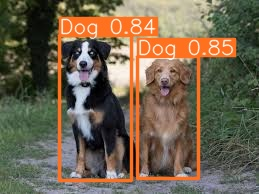

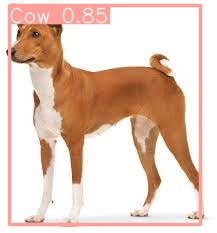

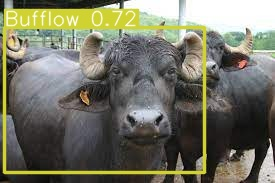

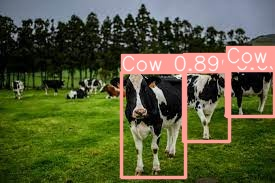

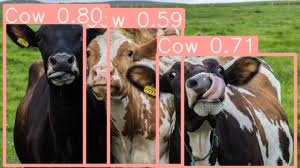

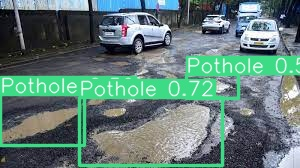

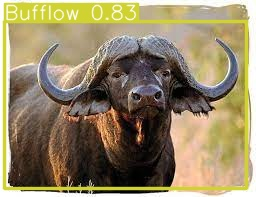

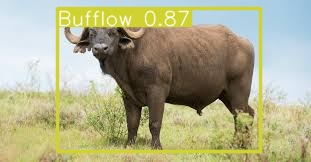

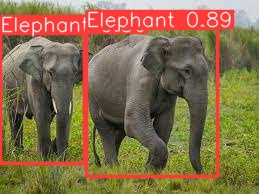

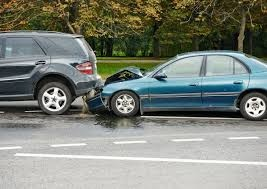

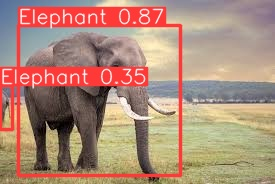

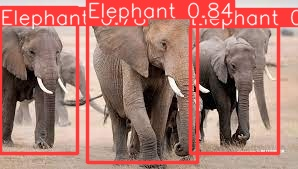

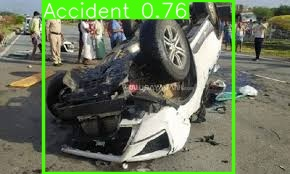

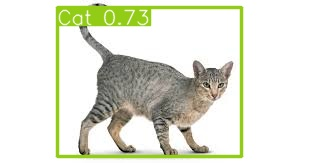

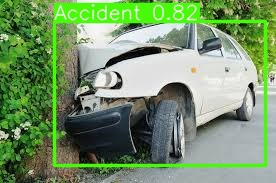

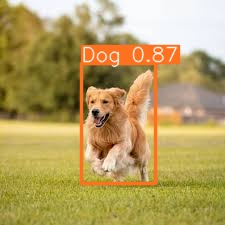

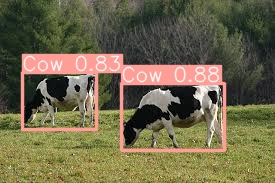

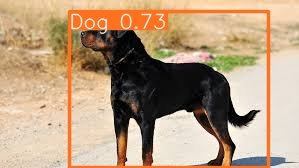

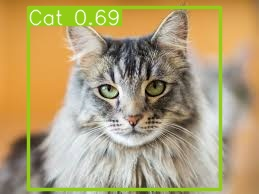

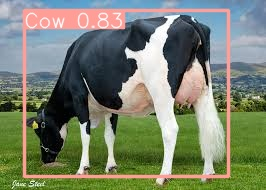

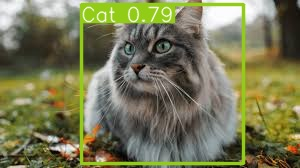

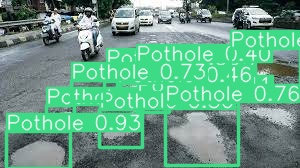

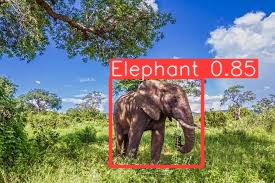

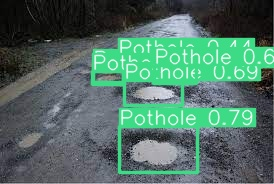

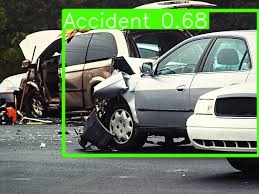

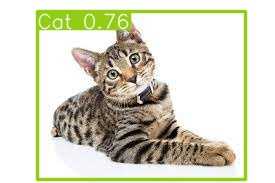

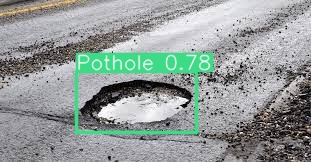

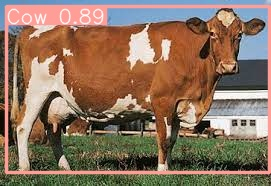

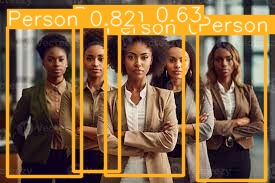

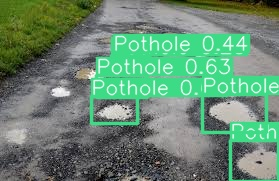

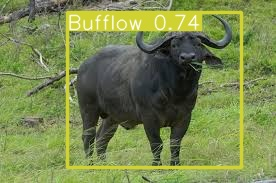

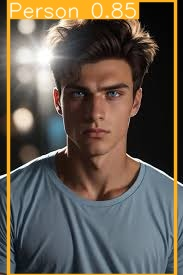

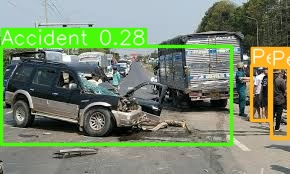

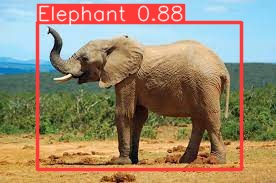

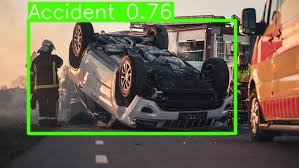

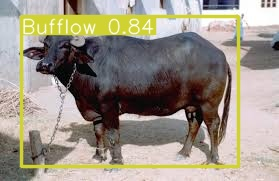

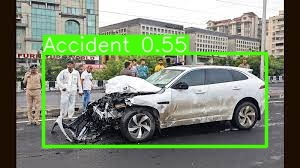

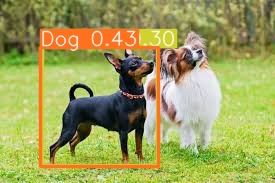

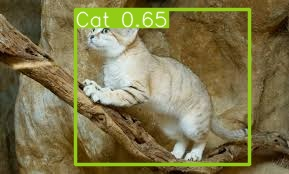

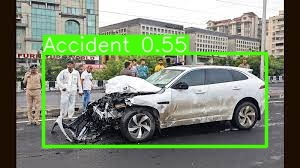

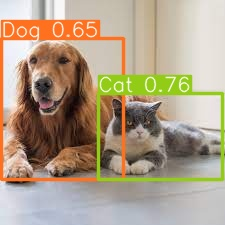

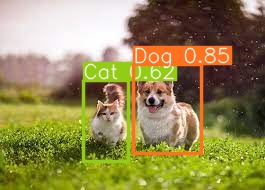

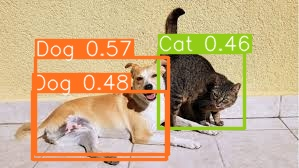

In [15]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/runs/detect/predict/*.jpeg'):
    display(Image(filename=imageName))
    print("\n")


In [18]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/pothole1.mp4

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (1/692) /content/pothole1.mp4: 384x640 1 Pothole, 90.3ms
video 1/1 (2/692) /content/pothole1.mp4: 384x640 3 Potholes, 8.3ms
video 1/1 (3/692) /content/pothole1.mp4: 384x640 3 Potholes, 8.6ms
video 1/1 (4/692) /content/pothole1.mp4: 384x640 4 Potholes, 8.5ms
video 1/1 (5/692) /content/pothole1.mp4: 384x640 3 Potholes, 7.7ms
video 1/1 (6/692) /content/pothole1.mp4: 384x640 2 Potholes, 10.7ms
video 1/1 (7/692) /content/pothole1.mp4: 384x640 2 Potholes, 7.6ms
video 1/1 (8/692) /content/pothole1.mp4: 384x640 3 Potholes, 6.9ms
video 1/1 (9/692) /content/pothole1.mp4: 384x640 2 Potholes, 9.8ms
video 1/1 (10/692) /content/pothole1.mp4: 384x640 2 Potholes, 7.3ms
video 1/1 (11/692) /content/pothole1.mp4: 384x640 2 Potholes, 7.4ms
video 1/1 (12/692) /content/pothole1.mp4: 384x640 2 Potholes, 9.4ms
video 1/1 (13/692) /cont

In [19]:
from google.colab import files

In [21]:
!zip -r yolov8n_50.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/predict2/ (stored 0%)
  adding: content/runs/detect/predict2/pothole1.avi (deflated 0%)
  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/15.jpeg (deflated 5%)
  adding: content/runs/detect/predict/11.jpeg (deflated 11%)
  adding: content/runs/detect/predict/19.jpeg (deflated 6%)
  adding: content/runs/detect/predict/10.jpeg (deflated 4%)
  adding: content/runs/detect/predict/8.jpeg (deflated 5%)
  adding: content/runs/detect/predict/42.jpeg (deflated 5%)
  adding: content/runs/detect/predict/18.jpeg (deflated 6%)
  adding: content/runs/detect/predict/21.jpeg (deflated 6%)
  adding: content/runs/detect/predict/2.jpeg (deflated 6%)
  adding: content/runs/detect/predict/28.jpeg (deflated 7%)
  adding: content/runs/detect/predict/5.jpeg (deflated 4%)
  adding: content/runs/detect/predict/3.jpeg (deflated 5%)
  adding: content/runs/detect/predi

In [ ]:
files.download('yolov8n_10.zip')

In [22]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/9MVVYSQ9ZI2D_jpg.rf.ad96ae272f1f481998ad484e56132f80.jpg

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/9MVVYSQ9ZI2D_jpg.rf.ad96ae272f1f481998ad484e56132f80.jpg: 640x640 1 Elephant, 10.1ms
Speed: 2.6ms preprocess, 10.1ms inference, 139.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict
